In [74]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))
from utils import task_score


from pathlib import Path
import json

import json
import numpy as np
import pandas as pd


In [75]:
import os

ag_df = pd.DataFrame()

for features in os.listdir('AutogluonModels'):
    if features == 'OLD':
        continue
    method = features.split('_')[-1]
    for random_state in os.listdir(f'AutogluonModels/{features}'):
        # skip if not directory
        if not os.path.isdir(f'AutogluonModels/{features}/{random_state}'):
            continue
        with open(os.path.join('AutogluonModels', features, random_state, "performance.json")) as f:
            data = json.load(f)
        task_scores = pd.DataFrame(data['task_score'])
        combined_df = pd.concat([
            pd.concat([pd.DataFrame({k: data[k] for k in data if k != 'task_score'},index=[0])] * task_scores.shape[0], ignore_index=True), 
            task_scores], axis=1
        )
        # features 
        combined_df['features'] = "_".join(features.split('_')[:-1])
        combined_df['method'] = method
        ag_df = pd.concat([ag_df, combined_df], axis=0)
ag_df = ag_df.reset_index(drop=True)
ag_df[ag_df['features']=='x102_x103_x106_x101']

,precision,accuracy,balanced_accuracy,mcc,f1,recall,model_name,score,random_state,features,method
200,0.750000,0.549,0.548192,0.163590,0.242017,0.144289,NeuralNetFastAI_r143_BAG_L1,6400.0,0,x102_x103_x106_x101,TreeMIF
201,0.750000,0.549,0.548192,0.163590,0.242017,0.144289,WeightedEnsemble_L2,6450.0,0,x102_x103_x106_x101,TreeMIF
202,0.750000,0.549,0.548192,0.163590,0.242017,0.144289,NeuralNetFastAI_r11_BAG_L1,6700.0,0,x102_x103_x106_x101,TreeMIF
203,0.750000,0.549,0.548192,0.163590,0.242017,0.144289,NeuralNetTorch_r158_BAG_L1,6600.0,0,x102_x103_x106_x101,TreeMIF
204,0.750000,0.549,0.548192,0.163590,0.242017,0.144289,NeuralNetFastAI_r103_BAG_L1,6650.0,0,x102_x103_x106_x101,TreeMIF
205,0.750000,0.549,0.548192,0.163590,0.242017,0.144289,NeuralNetTorch_r30_BAG_L1,6400.0,0,x102_x103_x106_x101,TreeMIF
206,0.750000,0.549,0.548192,0.163590,0.242017,0.144289,NeuralNetTorch_BAG_L1,6600.0,0,x102_x103_x106_x101,TreeMIF
207,0.750000,0.549,0.548192,0.163590,0.242017,0.144289,NeuralNetTorch_r14_BAG_L1,6750.0,0,x102_x103_x106_x101,TreeMIF
208,0.750000,0.549,0.548192,0.163590,0.242017,0.144289,NeuralNetTorch_r86_BAG_L1,6650.0,0,x102_x103_x106_x101,TreeMIF
209,0.750000,0.549,0.548192,0.163590,0.242017,0.144289,NeuralNetTorch_r22_BAG_L1,6500.0,0,x102_x103_x106_x101,TreeMIF


In [76]:
# create mean and count columns
ag_df_grouped = ag_df.groupby(['features', 'model_name', 'method']).agg({'score': ['mean', 'count', 'min', 'max','std']}).reset_index()
ag_df_grouped.columns = ['features', 'model_name', 'method','mean_score', 'count', 'min_score', 'max_score', 'std_score']
ag_df_grouped[ag_df_grouped['features']=='x102_x103_x106_x101']

,features,model_name,method,mean_score,count,min_score,max_score,std_score
64,x102_x103_x106_x101,ExtraTreesEntr_BAG_L2,TreeMIF,6500.0,1,6500.0,6500.0,NaN
65,x102_x103_x106_x101,NeuralNetFastAI_BAG_L1,TreeMIF,6650.0,1,6650.0,6650.0,NaN
66,x102_x103_x106_x101,NeuralNetFastAI_r103_BAG_L1,TreeMIF,6587.5,4,6450.0,6750.0,137.689264
67,x102_x103_x106_x101,NeuralNetFastAI_r11_BAG_L1,TreeMIF,6630.0,5,6500.0,6800.0,120.415946
68,x102_x103_x106_x101,NeuralNetFastAI_r143_BAG_L1,TreeMIF,6400.0,1,6400.0,6400.0,NaN
69,x102_x103_x106_x101,NeuralNetFastAI_r191_BAG_L1,TreeMIF,6450.0,1,6450.0,6450.0,NaN
70,x102_x103_x106_x101,NeuralNetFastAI_r191_BAG_L2,TreeMIF,6525.0,2,6200.0,6850.0,459.619408
71,x102_x103_x106_x101,NeuralNetTorch_BAG_L1,TreeMIF,6575.0,4,6400.0,6700.0,125.830574
72,x102_x103_x106_x101,NeuralNetTorch_r14_BAG_L1,TreeMIF,6600.0,4,6400.0,6750.0,147.196014
73,x102_x103_x106_x101,NeuralNetTorch_r158_BAG_L1,TreeMIF,6600.0,1,6600.0,6600.0,NaN


In [77]:
pd.Series(['x102_x103_x106_x101']).apply(lambda x: "_".join(sorted(x.split('_'))))

0    x101_x102_x103_x106
dtype: object

In [78]:
ag_df_best = ag_df_grouped.sort_values(
    ["min_score", "std_score"], ascending=[False, True]
)
ag_df_best = ag_df_best[
   [ "features",
    "model_name",
    "method",
    "mean_score",
    "min_score",
    "max_score",
    "std_score",
    "count",]
]
# round to 2 decimal places
ag_df_best = ag_df_best.round(2)
# ag_df_best = ag_df_best[ag_df_best["count"] >= 2].head(25).reset_index(drop=True)
# call index index
ag_df_best.index += 1
# ag_df_best[(ag_df_best["method"] == "TreeMIF") & (ag_df_best["features"]=='x102_x103_x106_x101')]
ag_df_best

,features,model_name,method,mean_score,min_score,max_score,std_score,count
262,x103_x106_x102_x105,NeuralNetFastAI_r37_BAG_L1,Iterative,7000.0,7000.0,7000.0,NaN,1
91,x102_x103_x106_x101_x104,NeuralNetTorch_r197_BAG_L1,TreeMIF,6900.0,6900.0,6900.0,NaN,1
116,x102_x106_x104,NeuralNetFastAI_BAG_L2,TreeMIF,6900.0,6900.0,6900.0,NaN,1
298,x105_x9_x103_x101_x104,NeuralNetTorch_r158_BAG_L1,TreeMIF,6900.0,6900.0,6900.0,NaN,1
310,x106_x101_x102_x105,NeuralNetFastAI_r191_BAG_L2,Iterative,6900.0,6900.0,6900.0,NaN,1
...,...,...,...,...,...,...,...,...
384,x1_x101_x102_x103_x104_x105_x106_x132_x140_x14...,NeuralNetTorch_r79_BAG_L2,LassoLR,-925.0,-1050.0,-800.0,176.78,2
374,x1_x101_x102_x103_x104_x105_x106_x132_x140_x14...,LightGBM_r131_BAG_L2,LassoLR,-1050.0,-1050.0,-1050.0,NaN,1
387,x1_x101_x102_x103_x104_x105_x106_x132_x140_x14...,XGBoost_BAG_L2,LassoLR,-1050.0,-1050.0,-1050.0,NaN,1
381,x1_x101_x102_x103_x104_x105_x106_x132_x140_x14...,NeuralNetTorch_BAG_L2,LassoLR,-1200.0,-1200.0,-1200.0,NaN,1


In [79]:
len(ag_df_best)

487

## Optuna results

In [80]:
svm_df = pd.read_csv("optuna/results_svm.csv")
svm_grouped = svm_df.groupby(['features', 'feature_selection_method']).agg({'test_score': ['mean', 'count', 'min', 'max','std']}).reset_index()
svm_grouped.columns = ['features','method', 'mean_score', 'count', 'min_score', 'max_score', 'std_score']
svm_grouped['model_name'] = 'SVM'
svm_grouped.sort_values('min_score', ascending=False)


,features,method,mean_score,count,min_score,max_score,std_score,model_name
1,x102_x103_x101_x104,TreeMIF,6850.0,5,6650.0,7000.0,145.773797,SVM
2,x102_x103_x106_x101,TreeMIF,6710.0,5,6550.0,7000.0,171.026314,SVM
5,x102_x106_x104,TreeMIF,6670.0,5,6550.0,6850.0,115.108644,SVM
14,x106_x101_x102_x105,Iterative,6730.0,5,6500.0,6950.0,213.892496,SVM
3,x102_x103_x106_x101_x104,TreeMIF,6720.0,5,6500.0,7100.0,251.495527,SVM
7,x103_x106_x101_x102,Iterative,6620.0,5,6500.0,6900.0,168.077363,SVM
11,x103_x106_x102_x105,Iterative,6570.0,5,6350.0,7150.0,334.664011,SVM
6,x103_x101_x102_x105,Iterative,6560.0,5,6250.0,6750.0,207.364414,SVM
8,x103_x106_x101_x102_x105,Iterative,6550.0,5,6200.0,6800.0,250.000000,SVM
4,x102_x106_x101_x104,TreeMIF,6570.0,5,6150.0,7050.0,321.325380,SVM


In [81]:
qda_df = pd.read_csv("optuna/results_qda.csv") 
qda_grouped = qda_df.groupby(['features','feature_selection_method']).agg({'test_score': ['mean', 'count', 'min', 'max', 'std']}).reset_index()
qda_grouped.columns = ['features', 'method','mean_score', 'count', 'min_score', 'max_score', 'std_score']
qda_grouped['model_name'] = 'QDA'
qda_grouped.sort_values('min_score', ascending=False)


,features,method,mean_score,count,min_score,max_score,std_score,model_name
5,x102_x106_x104,TreeMIF,6720.0,5,6550.0,7100.0,225.277607,QDA
2,x102_x103_x106_x101,TreeMIF,6660.0,5,6500.0,6950.0,174.642492,QDA
3,x102_x103_x106_x101_x104,TreeMIF,6770.0,5,6500.0,7150.0,258.843582,QDA
7,x103_x106_x101_x102,Iterative,6650.0,5,6500.0,6950.0,176.776695,QDA
1,x102_x103_x101_x104,TreeMIF,6750.0,5,6450.0,7000.0,203.100960,QDA
11,x103_x106_x102_x105,Iterative,6710.0,5,6450.0,7050.0,227.486263,QDA
14,x106_x101_x102_x105,Iterative,6590.0,5,6350.0,6800.0,201.246118,QDA
6,x103_x101_x102_x105,Iterative,6600.0,5,6350.0,6700.0,145.773797,QDA
8,x103_x106_x101_x102_x105,Iterative,6560.0,5,6300.0,6800.0,227.486263,QDA
12,x105_x102_x103_x106_x101,TreeMIF,6560.0,5,6300.0,6800.0,227.486263,QDA


---

# Random Forest

In [82]:
rf_df = pd.read_csv("optuna/results_rf.csv")
rf_grouped = rf_df.groupby(['features', 'feature_selection_method']).agg({'test_score': ['mean', 'count', 'min', 'max', 'std']}).reset_index()
rf_grouped.columns = ['features', 'method', 'mean_score', 'count', 'min_score', 'max_score', 'std_score']
rf_grouped['model_name'] = 'RF'
rf_grouped.sort_values('min_score', ascending=False)

,features,method,mean_score,count,min_score,max_score,std_score,model_name
1,x102_x103_x101_x104,TreeMIF,6440.0,5,6300.0,6600.0,129.421791,RF
2,x102_x103_x106_x101,TreeMIF,6340.0,5,6200.0,6400.0,82.158384,RF
3,x102_x103_x106_x101_x104,TreeMIF,6360.0,5,6200.0,6550.0,155.724115,RF
6,x103_x101_x102_x105,Iterative,6360.0,5,6150.0,6650.0,181.659021,RF
7,x103_x106_x101_x102,Iterative,6300.0,5,6150.0,6450.0,127.475488,RF
9,x103_x106_x101_x105,Iterative,6390.0,5,6150.0,6600.0,163.554272,RF
4,x102_x106_x101_x104,TreeMIF,6290.0,5,6100.0,6600.0,207.364414,RF
5,x102_x106_x104,TreeMIF,6400.0,5,6100.0,6600.0,183.711731,RF
14,x106_x101_x102_x105,Iterative,6330.0,5,5950.0,6750.0,292.831009,RF
8,x103_x106_x101_x102_x105,Iterative,6150.0,5,5950.0,6400.0,176.776695,RF


# LGBM

In [83]:
lgbm_df = pd.read_csv("optuna/results_lgbm.csv")
lgbm_grouped = lgbm_df.groupby(['features', 'feature_selection_method']).agg({'test_score': ['mean', 'count', 'min', 'max', 'std']}).reset_index()
lgbm_grouped.columns = ['features', 'method', 'mean_score', 'count', 'min_score', 'max_score', 'std_score']
lgbm_grouped['model_name'] = 'LGBM'
lgbm_grouped.sort_values('min_score', ascending=False)

,features,method,mean_score,count,min_score,max_score,std_score,model_name
2,x102_x103_x106_x101,TreeMIF,6600.0,5,6500.0,6700.0,79.056942,LGBM
5,x102_x106_x104,TreeMIF,6510.0,5,6400.0,6650.0,96.176920,LGBM
11,x103_x106_x102_x105,Iterative,6570.0,5,6400.0,6750.0,125.499004,LGBM
3,x102_x103_x106_x101_x104,TreeMIF,6610.0,5,6350.0,6800.0,167.332005,LGBM
9,x103_x106_x101_x105,Iterative,6490.0,5,6350.0,6650.0,151.657509,LGBM
1,x102_x103_x101_x104,TreeMIF,6530.0,5,6350.0,6800.0,195.576072,LGBM
14,x106_x101_x102_x105,Iterative,6430.0,5,6300.0,6700.0,160.468065,LGBM
4,x102_x106_x101_x104,TreeMIF,6500.0,5,6250.0,6850.0,231.840462,LGBM
7,x103_x106_x101_x102,Iterative,6460.0,5,6200.0,6600.0,163.554272,LGBM
6,x103_x101_x102_x105,Iterative,6340.0,5,6050.0,6550.0,207.364414,LGBM


# Logistic Regression

In [84]:
lr_df = pd.read_csv("optuna/results_lr.csv")
lr_grouped = lr_df.groupby(['features', 'feature_selection_method']).agg({'test_score': ['mean', 'count', 'min', 'max', 'std']}).reset_index()
lr_grouped.columns = ['features', 'method', 'mean_score', 'count', 'min_score', 'max_score', 'std_score']
lr_grouped['model_name'] = 'LogReg'
lr_grouped.sort_values('min_score', ascending=False)

,features,method,mean_score,count,min_score,max_score,std_score,model_name
5,x102_x106_x104,TreeMIF,5130.0,5,4950.0,5500.0,213.892496,LogReg
18,x329_x352_x413,Genetic,4940.0,5,4800.0,5150.0,134.164079,LogReg
9,x103_x106_x101_x105,Iterative,5130.0,5,4800.0,5600.0,309.434969,LogReg
11,x103_x106_x102_x105,Iterative,5050.0,5,4800.0,5300.0,180.277564,LogReg
2,x102_x103_x106_x101,TreeMIF,4970.0,5,4700.0,5300.0,216.794834,LogReg
3,x102_x103_x106_x101_x104,TreeMIF,4940.0,5,4700.0,5150.0,213.307290,LogReg
7,x103_x106_x101_x102,Iterative,4970.0,5,4700.0,5300.0,216.794834,LogReg
14,x106_x101_x102_x105,Iterative,4950.0,5,4700.0,5300.0,244.948974,LogReg
19,x423,Genetic,4950.0,5,4700.0,5450.0,293.683503,LogReg
1,x102_x103_x101_x104,TreeMIF,4890.0,5,4650.0,5200.0,210.356840,LogReg


# All models

In [85]:
all_results = pd.concat([ag_df_best, svm_grouped, qda_grouped, rf_grouped, lgbm_grouped, lr_grouped], axis=0)
all_results = all_results.sort_values('min_score', ascending=False)
all_results['features'] = all_results['features'].apply(lambda x: "_".join(sorted(x.split('_'))))
all_results= all_results[all_results['count'] > 1].sort_values(['min_score', 'std_score'], ascending=[False, True]).head(25).reset_index(drop=True)
all_results = all_results.round(2)
all_results.index += 1
all_results


,features,model_name,method,mean_score,min_score,max_score,std_score,count
1,TreeMIF_before_x101_x102_x103_x104,NeuralNetTorch_r14_BAG_L1,refit copy,6900.00,6800.0,7000.0,141.42,2
2,TreeMIF_before_x101_x102_x103_x104,NeuralNetTorch_r14_BAG_L1,refit,6900.00,6800.0,7000.0,141.42,2
3,x101_x102_x103_x104,NeuralNetTorch_r14_BAG_L1,TreeMIF,6900.00,6800.0,7000.0,141.42,2
4,x101_x102_x103_x106,NeuralNetTorch_r197_BAG_L1,Iterative copy,6775.00,6750.0,6800.0,35.36,2
5,x101_x102_x103_x106,NeuralNetTorch_r197_BAG_L1,Iterative,6775.00,6750.0,6800.0,35.36,2
6,x101_x103_x105_x106,NeuralNetTorch_r30_BAG_L1,Iterative,6766.67,6700.0,6800.0,57.74,3
7,x101_x102_x105_x106,NeuralNetTorch_r197_BAG_L1,Iterative,6800.00,6700.0,6900.0,100.00,3
8,x101_x102_x103_x105_x106,NeuralNetTorch_r14_BAG_L1,Iterative,6700.00,6650.0,6750.0,70.71,2
9,x102_x104_x106,NeuralNetFastAI_r191_BAG_L2,TreeMIF,6733.33,6650.0,6800.0,76.38,3
10,TreeMIF_before_x101_x102_x103_x104,NeuralNetFastAI_r11_BAG_L1,refit,6780.00,6650.0,6900.0,90.83,5


In [86]:
if not os.path.exists('results_summary'):
    os.mkdir('results_summary')
all_results.to_csv('results_summary/all_results.csv', index=False)

In [87]:
from matplotlib import pyplot as plt
import seaborn as sns

In [88]:
svm_df['model_name'] = 'SVM'
rf_df['model_name'] = 'RF'
lgbm_df['model_name'] = 'LGBM'
lr_df['model_name'] = 'LogReg'
qda_df['model_name'] = 'QDA'

svm_df.rename(columns={'test_score': 'score'}, inplace=True)
rf_df.rename(columns={'test_score': 'score'}, inplace=True)
lgbm_df.rename(columns={'test_score': 'score'}, inplace=True)
lr_df.rename(columns={'test_score': 'score'}, inplace=True)
qda_df.rename(columns={'test_score': 'score'}, inplace=True)


svm_df.rename(columns={'feature_selection_method': 'method'}, inplace=True)
rf_df.rename(columns={'feature_selection_method': 'method'}, inplace=True)
lgbm_df.rename(columns={'feature_selection_method': 'method'}, inplace=True)
lr_df.rename(columns={'feature_selection_method': 'method'}, inplace=True)
qda_df.rename(columns={'feature_selection_method': 'method'}, inplace=True)



In [89]:
svm_df

,C,gamma,features,score,random_state,method,precision,f1,recall,accuracy,model_name
0,6.220156,0.052655,x103_x106_x101_x5_x102_x105,6300.0,0,Iterative,0.682573,0.670744,0.659319,0.677,SVM
1,6.220156,0.052655,x103_x106_x101_x5_x102_x105,5900.0,1,Iterative,0.687636,0.660417,0.635271,0.674,SVM
2,6.220156,0.052655,x103_x106_x101_x5_x102_x105,6400.0,2,Iterative,0.699387,0.692308,0.685371,0.696,SVM
3,6.220156,0.052655,x103_x106_x101_x5_x102_x105,6650.0,3,Iterative,0.685535,0.670082,0.655311,0.678,SVM
4,6.220156,0.052655,x103_x106_x101_x5_x102_x105,6550.0,4,Iterative,0.715217,0.686131,0.659319,0.699,SVM
...,...,...,...,...,...,...,...,...,...,...,...
100,0.275980,0.395855,x106_x176_x413_x459,5700.0,0,Filters,0.579677,0.538627,0.503006,0.570,SVM
101,0.275980,0.395855,x106_x176_x413_x459,5500.0,1,Filters,0.579365,0.499430,0.438878,0.561,SVM
102,0.275980,0.395855,x106_x176_x413_x459,5350.0,2,Filters,0.553535,0.551308,0.549098,0.554,SVM
103,0.275980,0.395855,x106_x176_x413_x459,5600.0,3,Filters,0.576355,0.517127,0.468938,0.563,SVM


In [90]:
all_ungrpd = pd.concat([ag_df, svm_df, qda_df, rf_df, lgbm_df, lr_df], axis=0)
all_ungrpd = all_ungrpd[['features', 'model_name', 'method', 'score', 'accuracy', 'f1', 'precision', ]]
all_ungrpd

,features,model_name,method,score,accuracy,f1,precision
0,x101_x102_x103_x104_x105_x106_x9,NeuralNetFastAI_r11_BAG_L1,Boruta,6200.0,0.684,0.630841,0.756303
1,x101_x102_x103_x104_x105_x106_x9,WeightedEnsemble_L2,Boruta,6200.0,0.684,0.630841,0.756303
2,x101_x102_x103_x104_x105_x106_x9,WeightedEnsemble_L3,Boruta,6250.0,0.684,0.630841,0.756303
3,x101_x102_x103_x104_x105_x106_x9,NeuralNetTorch_r30_BAG_L1,Boruta,6200.0,0.684,0.630841,0.756303
4,x101_x102_x103_x104_x105_x106_x9,NeuralNetTorch_r86_BAG_L1,Boruta,6200.0,0.684,0.630841,0.756303
...,...,...,...,...,...,...,...
100,x106_x176_x413_x459,LogReg,Filters,4650.0,0.530,0.528112,0.529175
101,x106_x176_x413_x459,LogReg,Filters,5250.0,0.552,0.539095,0.553911
102,x106_x176_x413_x459,LogReg,Filters,4800.0,0.533,0.514048,0.534632
103,x106_x176_x413_x459,LogReg,Filters,4050.0,0.523,0.542665,0.520221


In [91]:
all_ungrpd.groupby(['features', 'model_name', 'method']).agg({'score': ['mean', 'count', 'min', 'max','std']}).reset_index()

features                   model_name   method  \
                                                                              
0    x101_x102_x103_x104_x105_x106_x9                         LGBM   Boruta   
1    x101_x102_x103_x104_x105_x106_x9                       LogReg   Boruta   
2    x101_x102_x103_x104_x105_x106_x9       NeuralNetFastAI_BAG_L2   Boruta   
3    x101_x102_x103_x104_x105_x106_x9  NeuralNetFastAI_r103_BAG_L1   Boruta   
4    x101_x102_x103_x104_x105_x106_x9   NeuralNetFastAI_r11_BAG_L1   Boruta   
..                                ...                          ...      ...   
587                              x459                          QDA  Genetic   
588                              x459                           RF  Genetic   
589                              x459                          SVM  Genetic   
590                              x459          WeightedEnsemble_L2  Genetic   
591                              x459          XGBoost_r194_BAG_L1  Genetic   

      score                                    
       mean count     min     max         std  
0    6100.0     5  5850.0  6450.0  217.944947  
1    4450.0     5  4250.0  4900.0  271.569512  
2    6400.0     1  6400.0  6400.0         NaN  
3    6250.0     3  6000.0  6400.0  217.944947  
4    6360.0     5  5850.0  6700.0  359.513560  
..      ...   ...     ...     ...         ...  
587  5000.0     5  4350.0  5350.0  380.788655  
588  4710.0     5  4500.0  5350.0  359.513560  
589  5060.0     5  4650.0  5250.0  235.584380  
590  4925.0     2  4800.0  5050.0  176.776695  
591  5000.0     1  5000.0  5000.0         NaN  

[592 rows x 8 columns]

C:\Users\adamm\AppData\Local\Temp\ipykernel_30008\1043131256.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-75)
C:\Users\adamm\AppData\Local\Temp\ipykernel_30008\1043131256.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-75)
C:\Users\adamm\AppData\Local\Temp\ipykernel_30008\1043131256.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-75)
C:\Users\adamm\AppData\Local\Temp\ipykernel_30008\1043131256.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ro

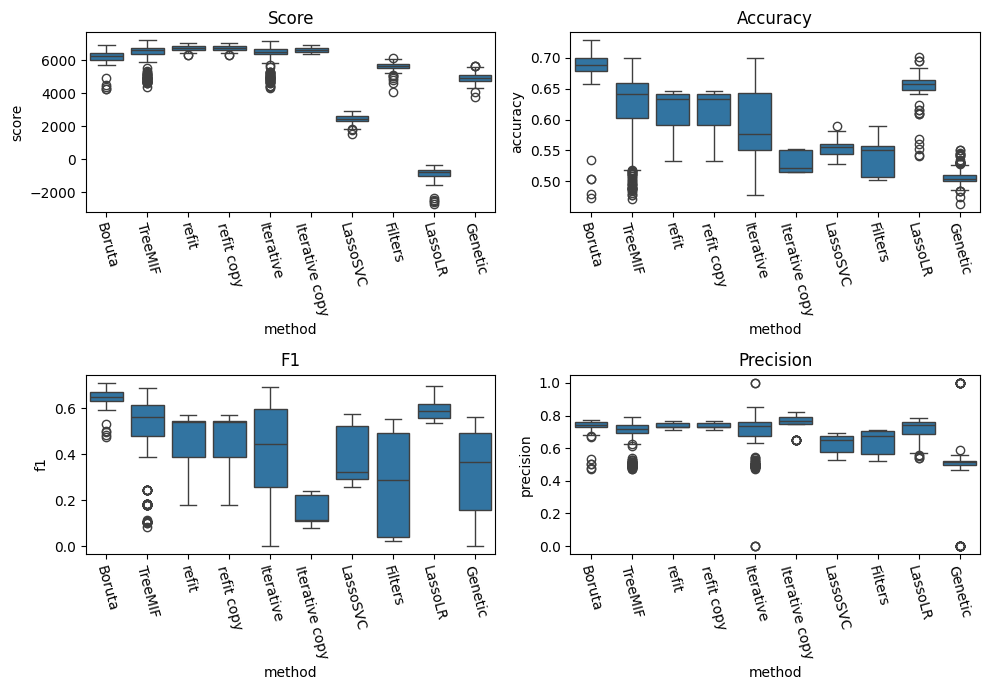

In [92]:
# plot results grouped by method (boxplot of score, accuracy, f1, precision), only 
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
sns.boxplot(data=all_ungrpd, x='method', y='score', ax=axes[0, 0])
sns.boxplot(data=all_ungrpd, x='method', y='accuracy', ax=axes[0, 1])
sns.boxplot(data=all_ungrpd, x='method', y='f1', ax=axes[1, 0])
sns.boxplot(data=all_ungrpd, x='method', y='precision', ax=axes[1, 1])
plt.tight_layout()
# rotate x labels
for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=-75)

# add space between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

# add titles
axes[0, 0].set_title('Score')
axes[0, 1].set_title('Accuracy')
axes[1, 0].set_title('F1')
axes[1, 1].set_title('Precision')
plt.tight_layout()
plt.savefig('results_summary/boxplot_results_grouped_selectors.png')
plt.show()


In [93]:
# get top 25 models by score
top_25_models = all_ungrpd.groupby(['features', 'model_name', 'method']).agg({'score': ['mean', 'count', 'min', 'max','std']}).reset_index()
top_25_models.columns = ['features', 'model_name', 'method','mean_score', 'count', 'min_score', 'max_score', 'std_score']
top_25_models = top_25_models[top_25_models['count'] > 1].sort_values(['min_score', 'std_score'], ascending=[False, True]).head(25).reset_index(drop=True)
top_25_models = all_ungrpd[all_ungrpd['model_name'].isin(top_25_models['model_name'])]
top_25_models

,features,model_name,method,score,accuracy,f1,precision
0,x101_x102_x103_x104_x105_x106_x9,NeuralNetFastAI_r11_BAG_L1,Boruta,6200.0,0.684,0.630841,0.756303
2,x101_x102_x103_x104_x105_x106_x9,WeightedEnsemble_L3,Boruta,6250.0,0.684,0.630841,0.756303
3,x101_x102_x103_x104_x105_x106_x9,NeuralNetTorch_r30_BAG_L1,Boruta,6200.0,0.684,0.630841,0.756303
5,x101_x102_x103_x104_x105_x106_x9,NeuralNetTorch_BAG_L1,Boruta,6450.0,0.684,0.630841,0.756303
8,x101_x102_x103_x104_x105_x106_x9,NeuralNetFastAI_r191_BAG_L2,Boruta,6200.0,0.684,0.630841,0.756303
...,...,...,...,...,...,...,...
100,x106_x176_x413_x459,SVM,Filters,5700.0,0.570,0.538627,0.579677
101,x106_x176_x413_x459,SVM,Filters,5500.0,0.561,0.499430,0.579365
102,x106_x176_x413_x459,SVM,Filters,5350.0,0.554,0.551308,0.553535
103,x106_x176_x413_x459,SVM,Filters,5600.0,0.563,0.517127,0.576355


C:\Users\adamm\AppData\Local\Temp\ipykernel_30008\1744284254.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)
C:\Users\adamm\AppData\Local\Temp\ipykernel_30008\1744284254.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)
C:\Users\adamm\AppData\Local\Temp\ipykernel_30008\1744284254.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)
C:\Users\adamm\AppData\Local\Temp\ipykernel_30008\1744284254.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ro

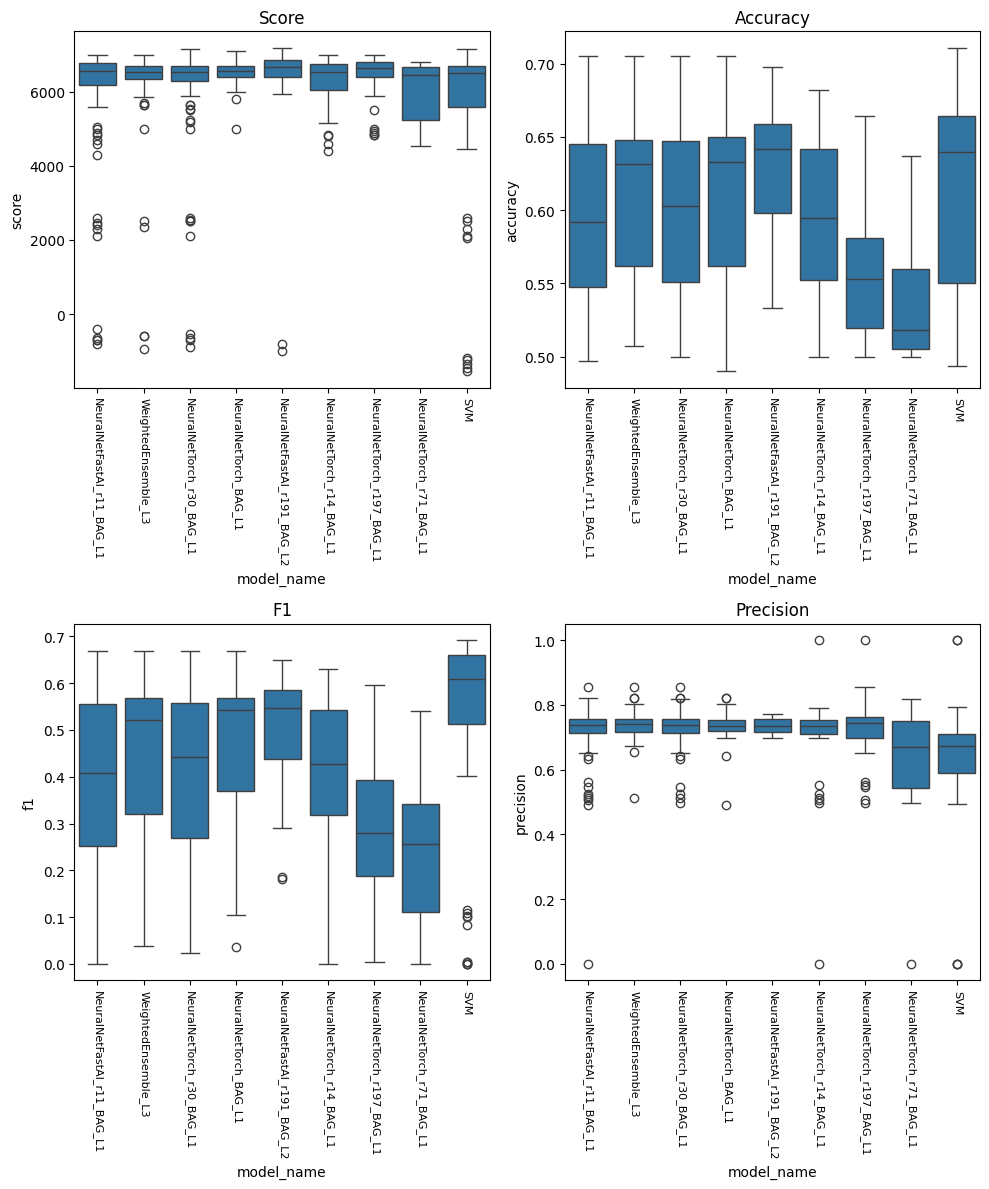

In [94]:
# Plot top 10 models by score, accuracy, f1, precision

fig, axes = plt.subplots(2, 2, figsize=(10, 12))
sns.boxplot(data=top_25_models, x='model_name', y='score', ax=axes[0, 0])
sns.boxplot(data=top_25_models, x='model_name', y='accuracy', ax=axes[0, 1])
sns.boxplot(data=top_25_models, x='model_name', y='f1', ax=axes[1, 0])
sns.boxplot(data=top_25_models, x='model_name', y='precision', ax=axes[1, 1])
plt.tight_layout()

# rotate x labels
for ax in axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)


# add space between subplots
plt.subplots_adjust(wspace=0.2, hspace=1)

# add titles
axes[0, 0].set_title('Score')
axes[0, 1].set_title('Accuracy')
axes[1, 0].set_title('F1')
axes[1, 1].set_title('Precision')

# make font on x-axis smaller
for ax in axes.flatten():
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()

plt.savefig('results_summary/boxplot_top_25_models.png')
plt.show()


# Choose best model

In [95]:
selected_columns = 'x101_x102_x103_x104'
selected_columns = selected_columns.split('_')
selected_columns

['x101', 'x102', 'x103', 'x104']

In [96]:
x_train = pd.read_csv("../../../data/x_train.txt", header=None, sep=" ")
y_train = pd.read_csv("../../../data/y_train.txt", header=None, sep=" ")
x_test = pd.read_csv("../../../data/x_test.txt", header=None, sep=" ")
x_train.columns = [f"x{i}" for i in range(1, x_train.shape[1] + 1)]
x_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x491,x492,x493,x494,x495,x496,x497,x498,x499,x500
0,-2.619773,-2.619533,-1.199350,-1.083335,-1.000910,-0.366967,-2.164037,-1.210001,-0.658311,-1.489539,...,10.849925,10.343346,10.717519,7.709295,5.894554,12.416573,6.765269,16.243907,7.209524,8.082021
1,-1.415579,-1.782544,-2.880270,-1.958863,1.159968,0.273030,-1.628728,-0.175813,-0.916857,-0.570166,...,11.489417,5.195818,3.494627,5.529154,10.517576,15.697333,11.324938,12.187670,12.283861,5.032285
2,-2.745092,-1.382945,-1.626015,-1.282560,-0.663146,0.052349,-2.403322,-0.765073,-0.394354,-0.806624,...,13.934934,9.267515,4.705604,6.642557,14.658934,8.130767,7.194487,11.939354,11.653620,5.942778
3,0.618998,0.455364,-0.115081,0.649040,-0.862207,2.308504,0.526114,-1.094852,1.088656,-0.481210,...,12.021328,3.852231,11.059702,7.527268,7.253120,9.791136,6.089743,10.752796,5.778888,10.366363
4,-0.070694,-0.550509,-0.565556,-0.693065,-0.573089,-0.395862,0.003170,-0.981609,-0.505775,-0.758430,...,7.537788,11.229665,11.318915,6.622256,12.557882,5.520360,5.397359,13.152269,10.684779,9.816471


In [97]:
x_train = x_train[selected_columns]
x_train.head()

,x101,x102,x103,x104
0,-0.915513,0.713780,0.264032,-0.177042
1,-1.513469,0.506429,1.071525,1.823868
2,-1.215839,-0.112797,-0.162820,0.771938
3,1.167745,0.777688,-1.572364,0.211630
4,0.219875,0.579971,0.702204,-0.455936


In [98]:
df_train = pd.concat([x_train, y_train], axis=1)

In [99]:
df_train.columns = df_train.columns[:-1].tolist() + ['y']

In [100]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,4.614910,3.533239,1.411254,1.928403,1.422256,1.684378,4.224090,1.836643,1.113460,1.939384,...,17.571403,12.539209,10.277104,11.655283,3.832188,12.160098,13.394882,6.672058,4.921887,22.506197
1,-0.169494,-0.855981,1.298991,0.351354,0.076671,1.865869,-0.129600,1.308967,1.067060,-1.854199,...,9.802786,12.230521,14.895335,5.429700,7.548378,2.895408,7.964216,8.052888,9.861593,5.841048
2,2.444993,1.659628,1.232445,1.121979,1.202193,1.683490,1.857638,2.039331,1.144583,-0.094331,...,10.570174,1.451766,16.452995,10.242988,3.719581,4.879446,10.613660,6.040261,4.856464,1.471197
3,0.588978,-1.141823,1.415624,-1.170370,-0.168715,-1.056512,-0.008172,-0.044626,-0.972869,-1.989544,...,7.797473,9.931698,3.904975,7.980700,6.255570,8.203613,14.295876,16.386562,9.864862,16.282600
4,-1.178631,0.273273,0.486322,2.193375,0.486168,1.052559,-1.034791,1.051397,1.885784,0.795154,...,5.498196,4.896865,12.892968,12.053610,4.856872,2.809012,7.240177,3.184421,7.564601,4.979622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.867898,0.412262,3.147125,0.087490,0.587370,0.223766,0.518351,0.475830,0.990792,-0.701617,...,16.059411,4.296284,1.634681,12.734981,14.861828,17.656444,16.622088,17.142455,7.455851,4.886648
4996,0.782079,0.378499,2.171310,-0.565453,-1.256248,0.096676,1.157765,-0.035374,-0.419760,-1.219046,...,5.465969,8.834548,12.432955,10.161597,11.723413,17.689242,10.175373,9.645264,11.178644,3.547213
4997,1.910101,-1.099589,0.463846,-0.125560,-0.824412,-2.479994,1.637667,-1.851135,-0.736779,-0.629895,...,5.549611,4.198496,13.691699,13.160420,12.527218,6.822645,24.169132,14.645722,12.292551,12.072822
4998,1.837925,1.071792,1.365311,1.172161,0.202237,-0.561750,2.068084,0.026813,0.779553,1.514086,...,8.329549,11.374237,7.496064,8.668392,5.067511,4.392825,5.026752,13.001219,13.774531,1.657855


In [101]:
x_test.columns = [f"x{i}" for i in range(1, x_test.shape[1] + 1)]
x_test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x491,x492,x493,x494,x495,x496,x497,x498,x499,x500
0,4.614910,3.533239,1.411254,1.928403,1.422256,1.684378,4.224090,1.836643,1.113460,1.939384,...,17.571403,12.539209,10.277104,11.655283,3.832188,12.160098,13.394882,6.672058,4.921887,22.506197
1,-0.169494,-0.855981,1.298991,0.351354,0.076671,1.865869,-0.129600,1.308967,1.067060,-1.854199,...,9.802786,12.230521,14.895335,5.429700,7.548378,2.895408,7.964216,8.052888,9.861593,5.841048
2,2.444993,1.659628,1.232445,1.121979,1.202193,1.683490,1.857638,2.039331,1.144583,-0.094331,...,10.570174,1.451766,16.452995,10.242988,3.719581,4.879446,10.613660,6.040261,4.856464,1.471197
3,0.588978,-1.141823,1.415624,-1.170370,-0.168715,-1.056512,-0.008172,-0.044626,-0.972869,-1.989544,...,7.797473,9.931698,3.904975,7.980700,6.255570,8.203613,14.295876,16.386562,9.864862,16.282600
4,-1.178631,0.273273,0.486322,2.193375,0.486168,1.052559,-1.034791,1.051397,1.885784,0.795154,...,5.498196,4.896865,12.892968,12.053610,4.856872,2.809012,7.240177,3.184421,7.564601,4.979622


In [102]:
x_test = x_test[selected_columns]
x_test.head()

,x101,x102,x103,x104
0,1.458316,-0.053930,-0.595807,0.211691
1,1.052628,-1.050203,-0.201871,-0.054339
2,1.587093,-1.362387,-0.372730,0.401261
3,1.252426,-2.127617,0.946437,-1.176868
4,-0.515955,1.392987,-0.588043,0.166982


In [103]:
df_train.head()

,x101,x102,x103,x104,y
0,-0.915513,0.713780,0.264032,-0.177042,0
1,-1.513469,0.506429,1.071525,1.823868,0
2,-1.215839,-0.112797,-0.162820,0.771938,1
3,1.167745,0.777688,-1.572364,0.211630,1
4,0.219875,0.579971,0.702204,-0.455936,1


In [104]:
from autogluon.tabular import TabularPredictor
model_full = TabularPredictor.load('AutogluonModels/x102_x103_x101_x104_TreeMIF/0/')
model_full.refit_full(model = "NeuralNetTorch_r14_BAG_L1", train_data_extra=df_train, verbosity=2, time_limit=1800)

Best model ("WeightedEnsemble_L3") is not present in refit_full dictionary. Training may have failed on the refit model. AutoGluon will default to using "WeightedEnsemble_L3" for predict() and predict_proba().


{'NeuralNetTorch_r14_BAG_L1': 'NeuralNetTorch_r14_BAG_L1_FULL'}

In [105]:
# predict using NeuralNetTorch_r14_BAG_L1_FULL
y_pred = model_full.predict_proba(x_test, model='NeuralNetTorch_r14_BAG_L1_FULL').loc[:,1]
y_pred

0       0.470295
1       0.421918
2       0.635838
3       0.760347
4       0.428658
          ...   
4995    0.713441
4996    0.704396
4997    0.944060
4998    0.547947
4999    0.300965
Name: 1, Length: 5000, dtype: float64

In [106]:
# predict using NeuralNetTorch_r14_BAG_L1_FULL
y_pred = model_full.predict_proba(x_test, model='NeuralNetTorch_r14_BAG_L1_FULL').loc[:,1]
y_pred, "on test data"

(0       0.470295
 1       0.421918
 2       0.635838
 3       0.760347
 4       0.428658
           ...   
 4995    0.713441
 4996    0.704396
 4997    0.944060
 4998    0.547947
 4999    0.300965
 Name: 1, Length: 5000, dtype: float64,
 'on test data')

In [107]:
# get indices of top 1000 most probable samples
top_indices = np.argsort(y_pred)[-1000:]
top_indices = top_indices + 1
# save to file top_indices.txt
np.savetxt('313420_obs.txt', top_indices, fmt='%d')
top_indices.tolist()

[4970,
 1387,
 3069,
 2932,
 1929,
 3541,
 4864,
 677,
 1086,
 1099,
 335,
 3834,
 4751,
 487,
 44,
 4853,
 2006,
 2776,
 4435,
 697,
 1987,
 163,
 4575,
 2371,
 2797,
 1782,
 4973,
 2970,
 3160,
 3844,
 2705,
 4410,
 175,
 2693,
 4544,
 4996,
 763,
 3833,
 4059,
 934,
 2988,
 4790,
 1780,
 519,
 4418,
 2785,
 429,
 2143,
 1442,
 3654,
 3066,
 2539,
 4803,
 1683,
 3997,
 261,
 1820,
 2953,
 4463,
 4343,
 3524,
 1881,
 1416,
 2761,
 3830,
 3476,
 1669,
 1906,
 3785,
 1152,
 43,
 1531,
 2980,
 3197,
 1946,
 4489,
 909,
 7,
 1599,
 2831,
 3735,
 3992,
 1219,
 4323,
 4628,
 2781,
 3948,
 3819,
 886,
 2648,
 4701,
 1383,
 3017,
 4772,
 3720,
 2289,
 3738,
 4982,
 626,
 2324,
 1025,
 3047,
 668,
 1463,
 3413,
 4983,
 358,
 3258,
 3349,
 3166,
 2244,
 927,
 1953,
 3332,
 4404,
 351,
 1976,
 931,
 4932,
 2437,
 1106,
 752,
 1453,
 3591,
 4714,
 1565,
 3994,
 1062,
 809,
 1334,
 156,
 1796,
 4570,
 2399,
 2190,
 4825,
 4271,
 67,
 1195,
 3198,
 279,
 4029,
 1530,
 280,
 4091,
 3338,
 4332,
 101

In [108]:
# save selected columns to file
selected_columns = 'x101_x102_x103_x104'
selected_columns = selected_columns.split('_')
selected_columns = [int(i[1:]) for i in selected_columns]
selected_columns

[101, 102, 103, 104]

In [109]:
# save to file 313420_vars.txt
np.savetxt('313420_vars.txt', selected_columns, fmt='%d')